In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

In [ ]:
# Loading the Dataset
rflfso_data = pd.read_csv('/content/drive/MyDrive/RFLFSODataFull.csv')

In [ ]:
# Displaying the dataset
rflfso_data.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [ ]:
# Step 1: Inspect the Dataset
print("Dataset Info:")
rflfso_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance               91379 non-null  float64
 6   Frequency              91379 non-null  int64  
 7   Particulate            91379 non-null  float64
 8   ParticulateMax         91379 non-null  float64
 9   ParticulateMin         91379 non-null  float64
 10  RainIntensity          91379 non-null  float64
 11  RainIntensityMax       91379 non-null  float64
 12  RainIntensityMin       91379 non-null  float64
 13  RelativeHumidity       91379 non-null  float64
 14  SYNOPCode              91379 non-null  i

In [ ]:
# Ensuring there are no NA values
rflfso_data.isna().sum()

,0
FSO_Att,0
RFL_Att,0
AbsoluteHumidity,0
AbsoluteHumidityMax,0
AbsoluteHumidityMin,0
Distance,0
Frequency,0
Particulate,0
ParticulateMax,0
ParticulateMin,0


In [ ]:
# Ensuring SYNOP code is integer
rflfso_data['SYNOPCode'] = rflfso_data['SYNOPCode'].astype(int)

In [ ]:
# Summarizing the Dataset
print("\nDescriptive Statistics:")
rflfso_data.describe()


Descriptive Statistics:


,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,11.619098,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,3.438873,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,0.027142,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,10.829331,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,11.856560,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,12.847944,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,46.893150,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


In [ ]:
# Checking the columns
rflfso_data.columns


Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')

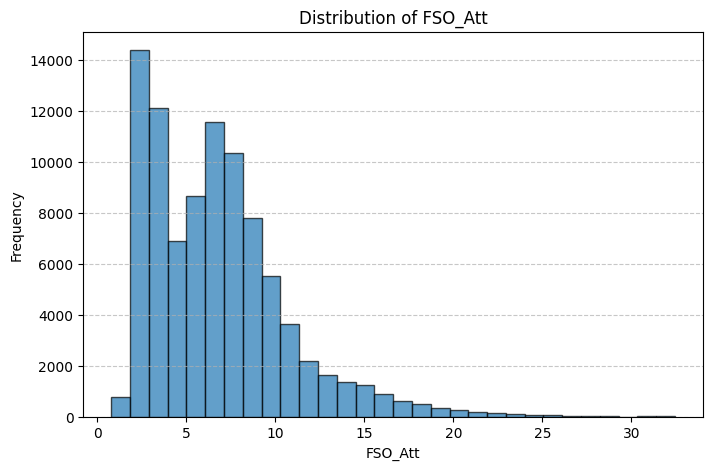

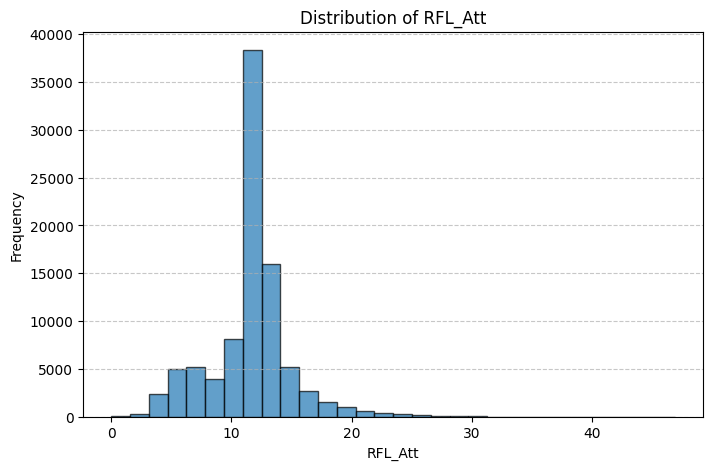

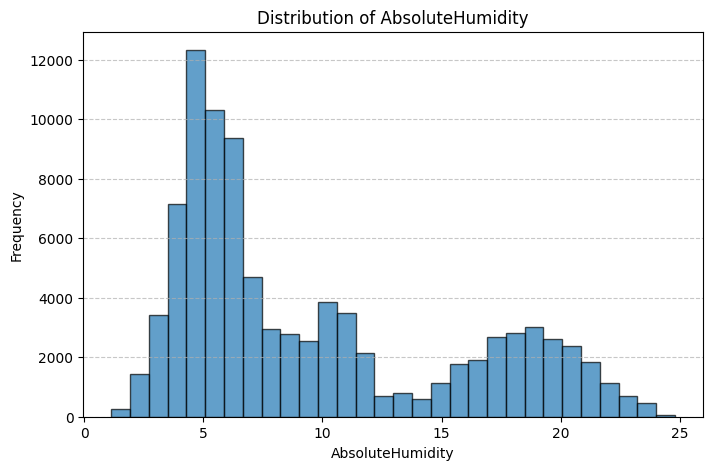

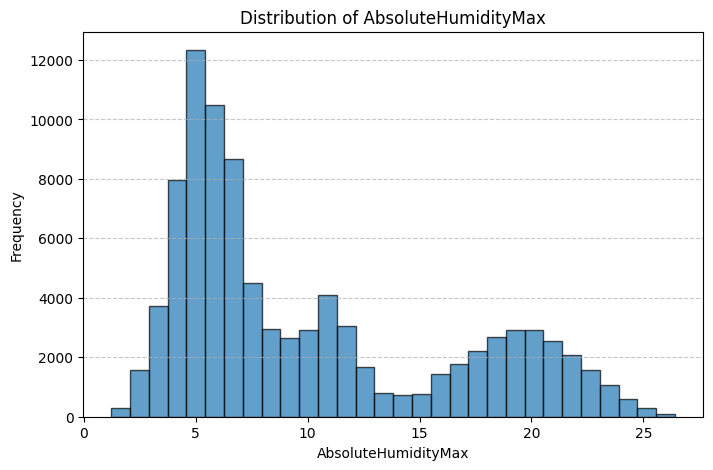

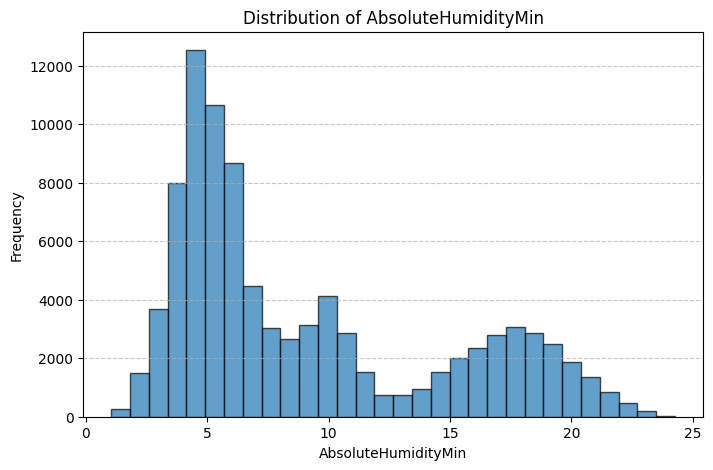

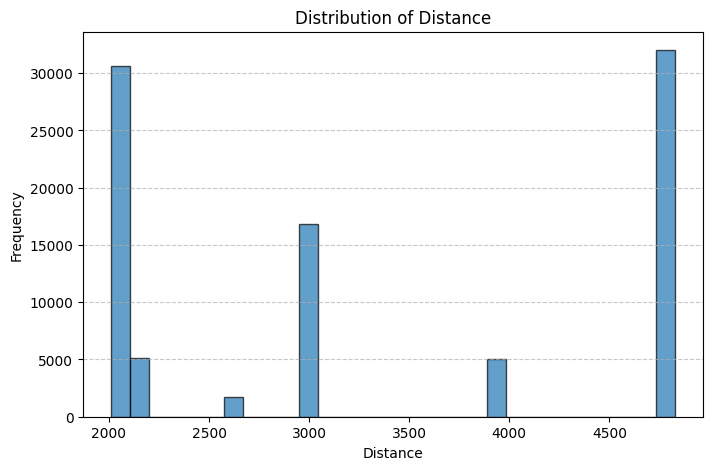

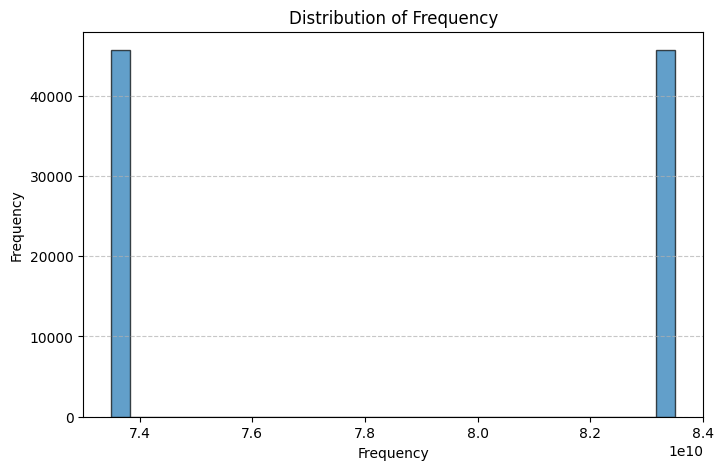

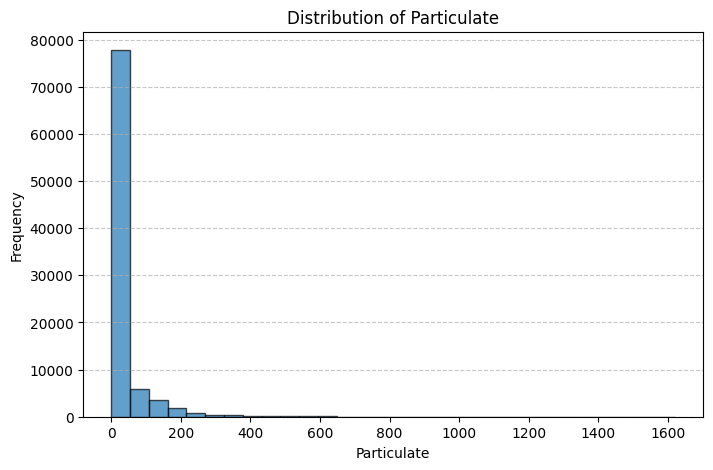

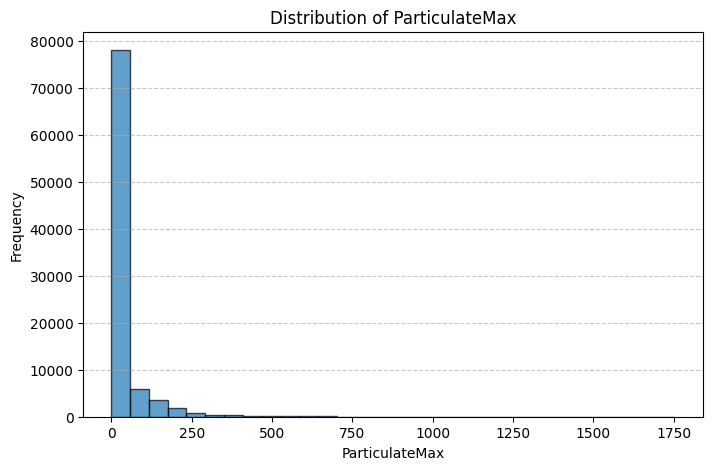

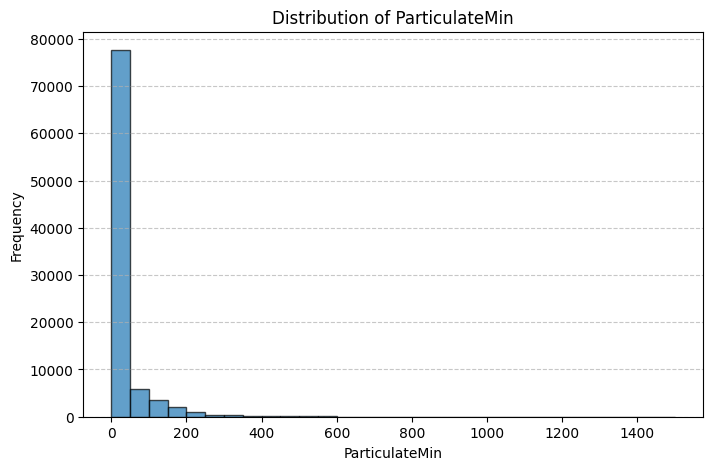

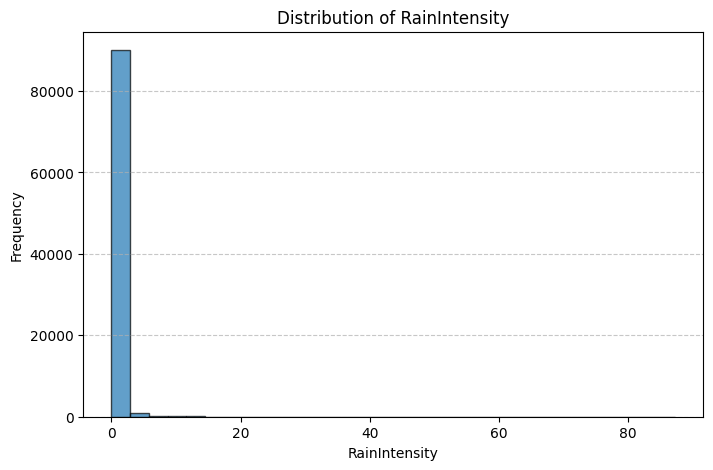

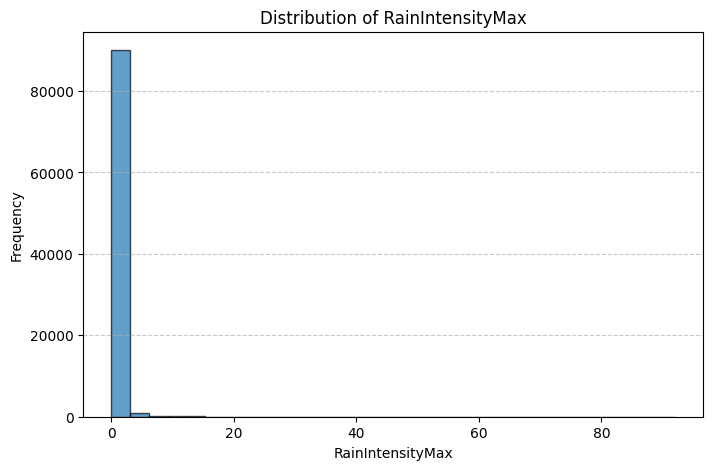

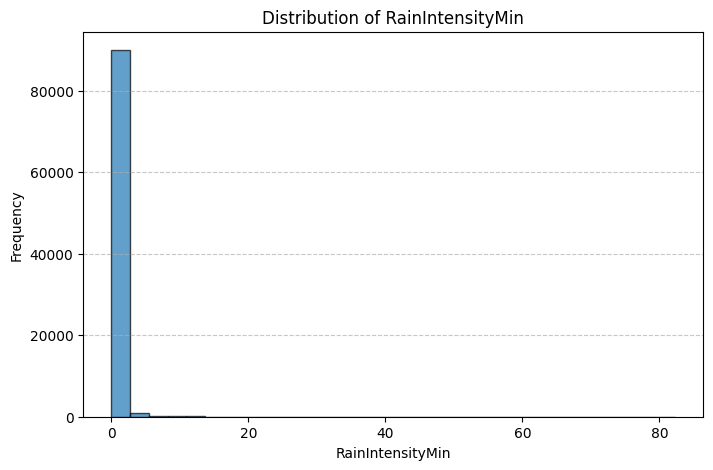

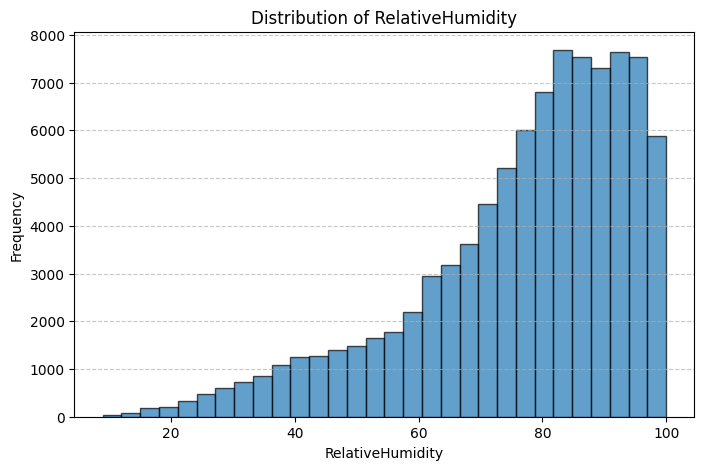

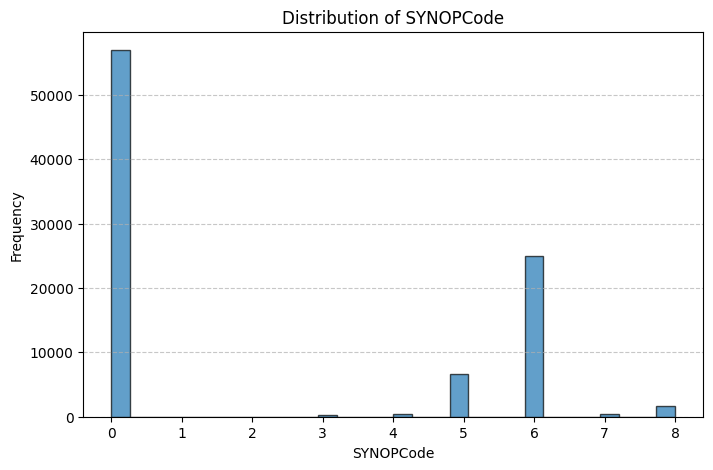

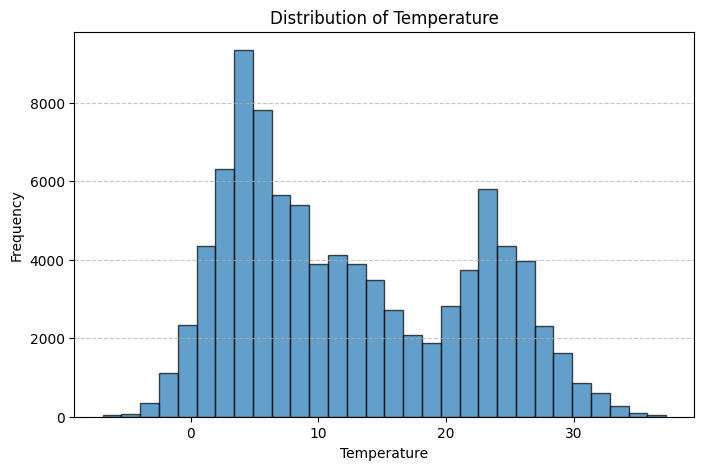

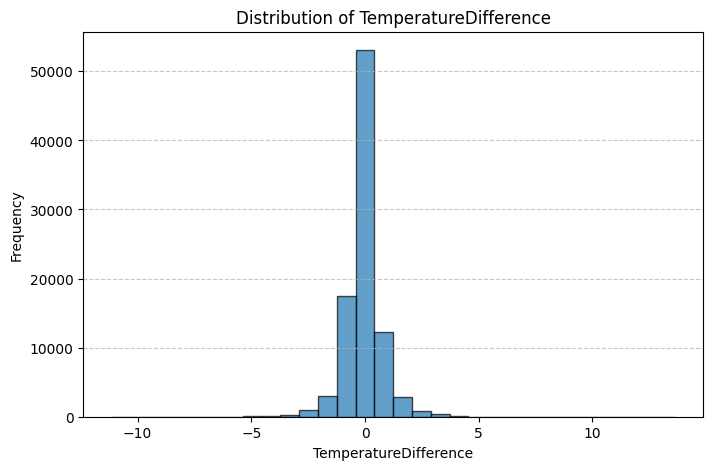

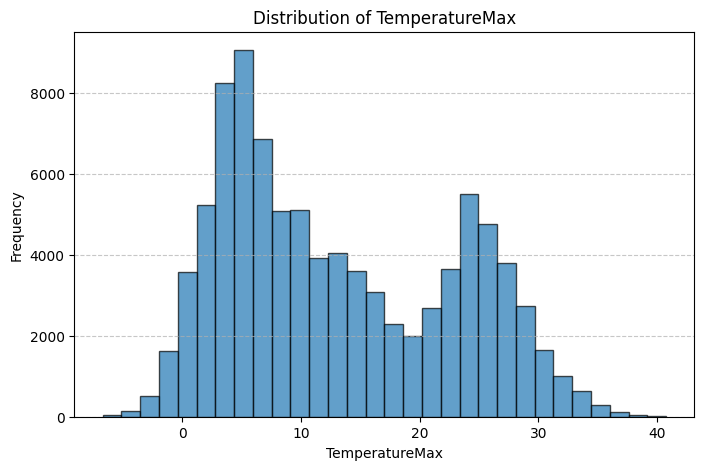

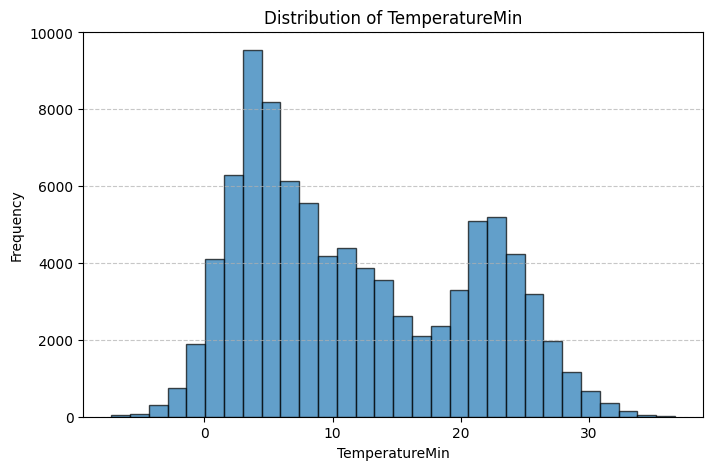

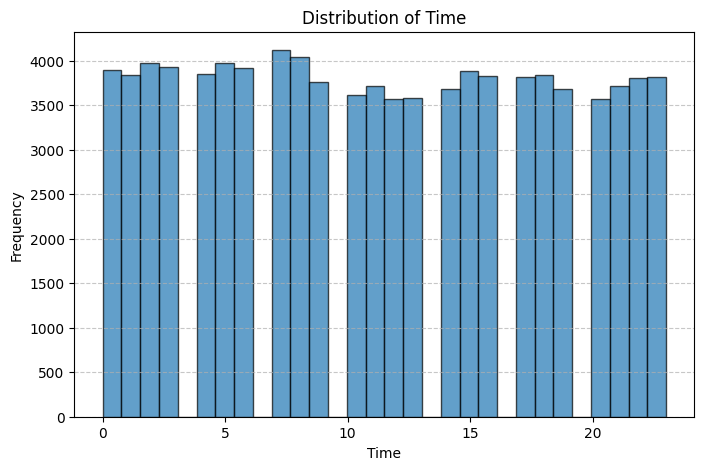

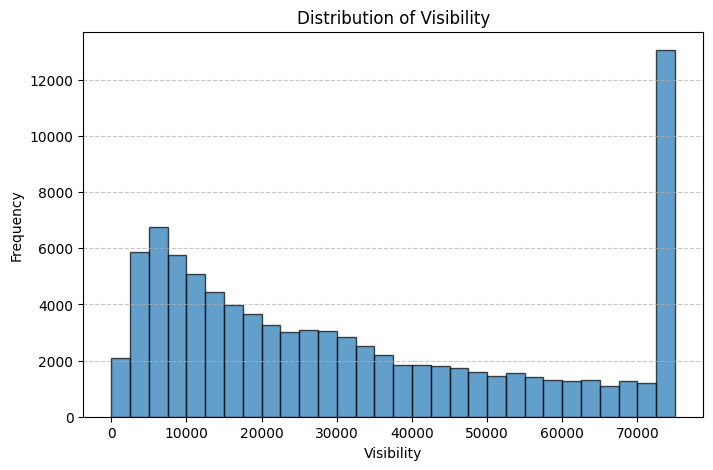

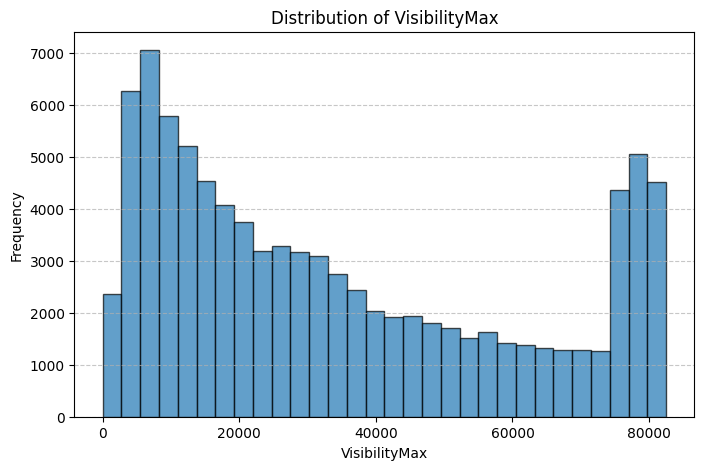

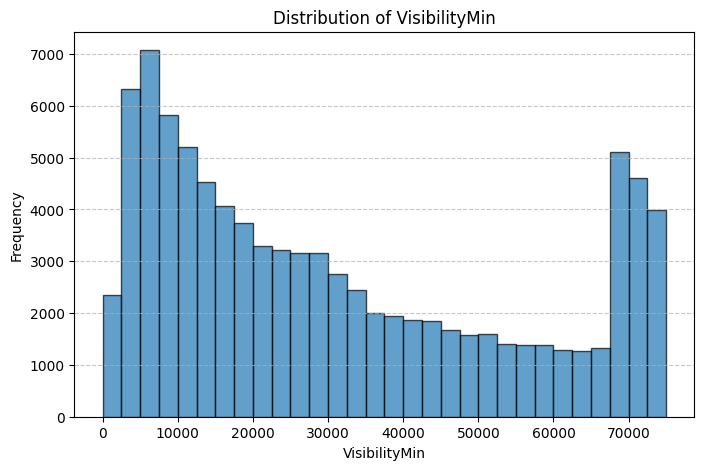

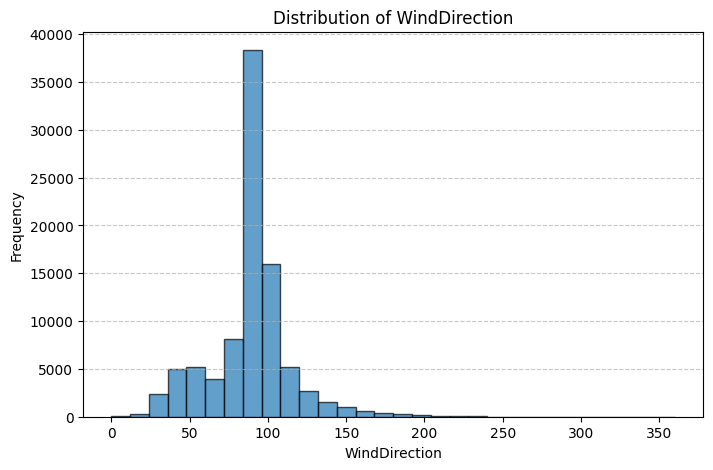

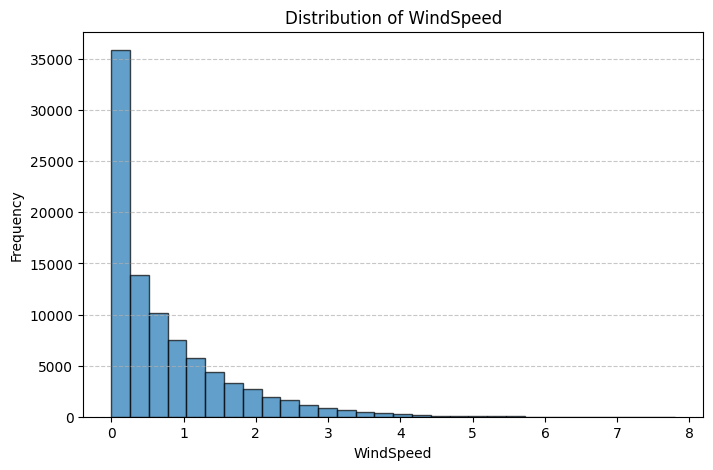

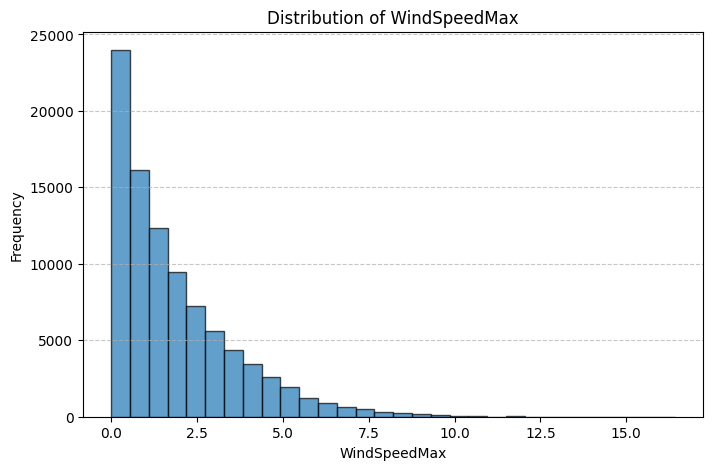

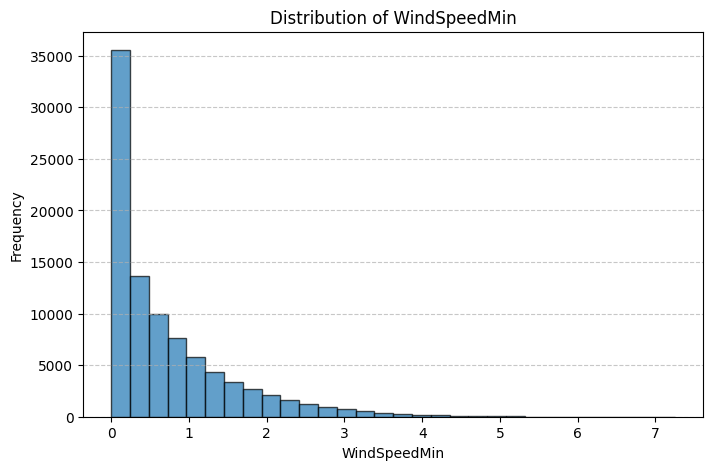

In [ ]:
# Visualizing Distributions for each and every columns in the dataset
for column in rflfso_data.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(rflfso_data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



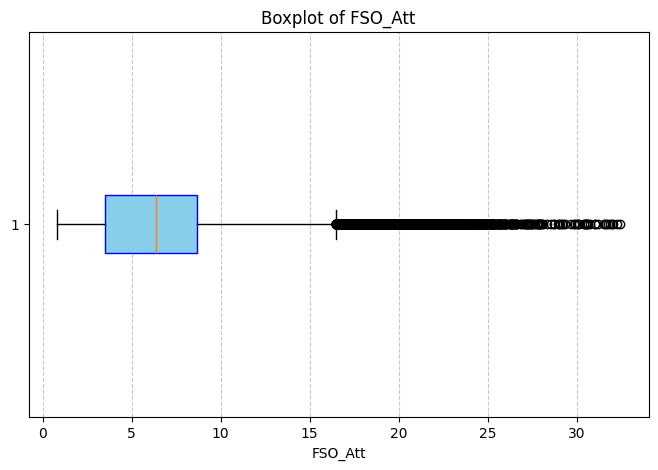

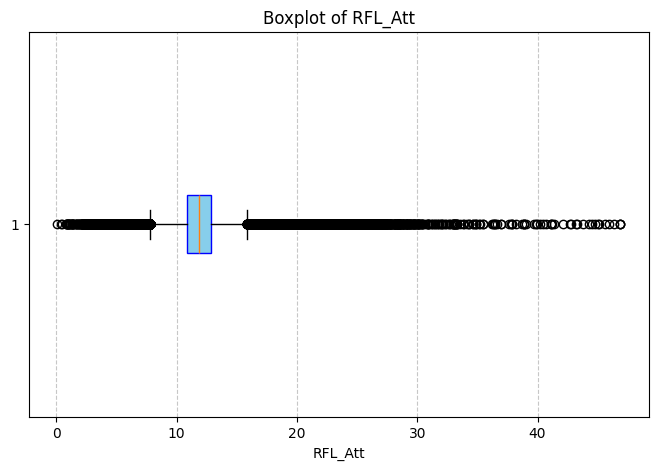

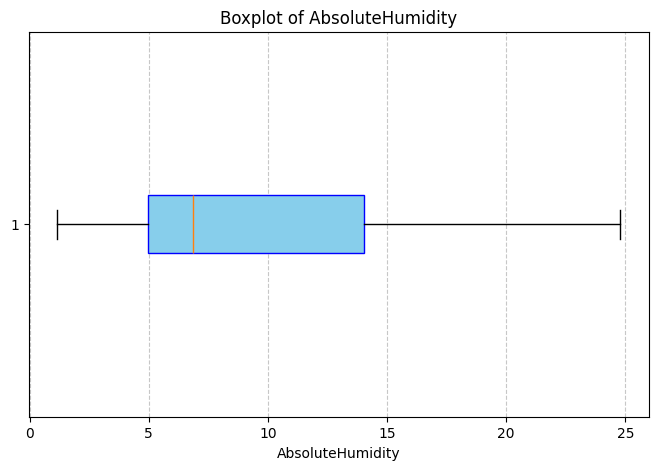

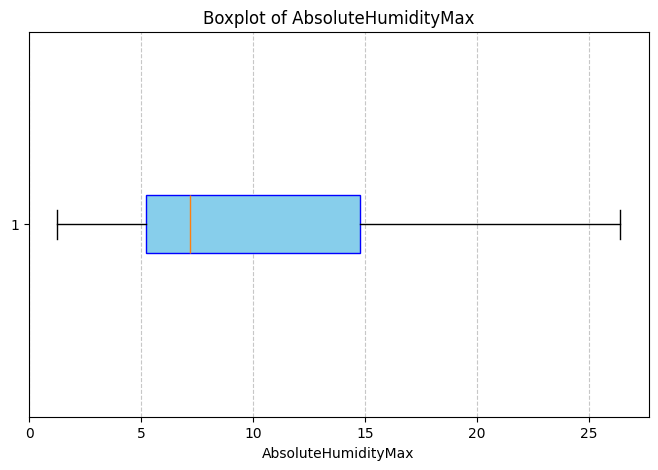

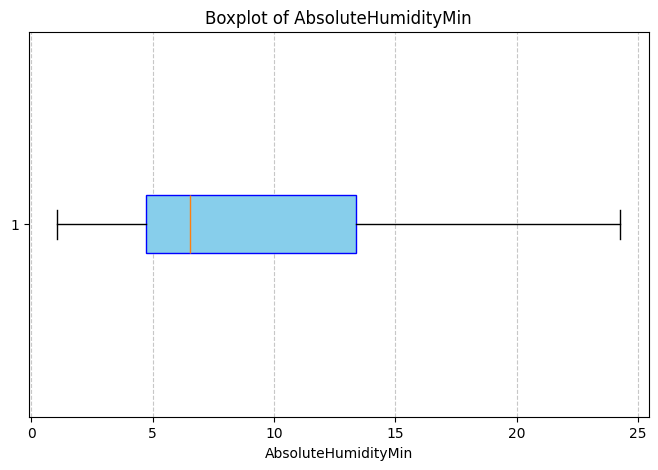

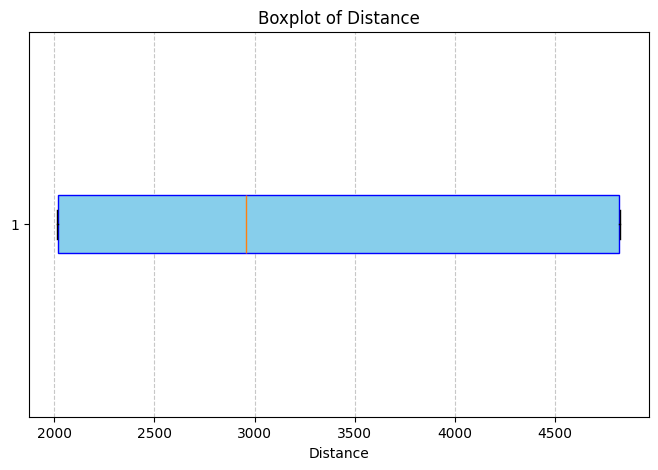

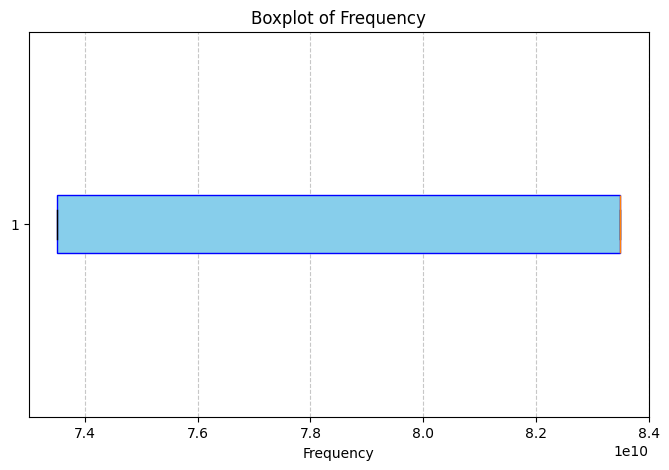

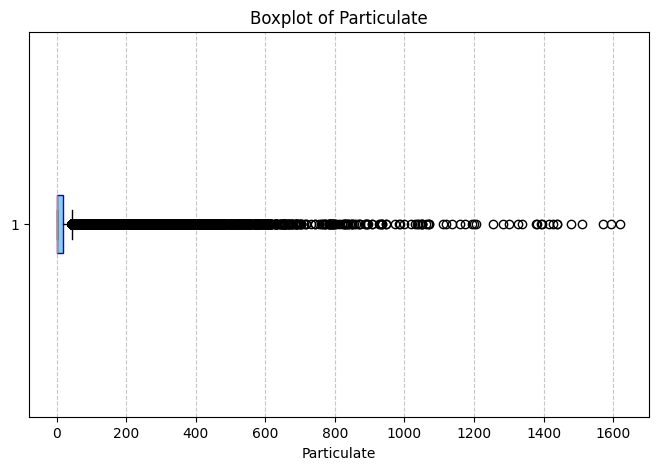

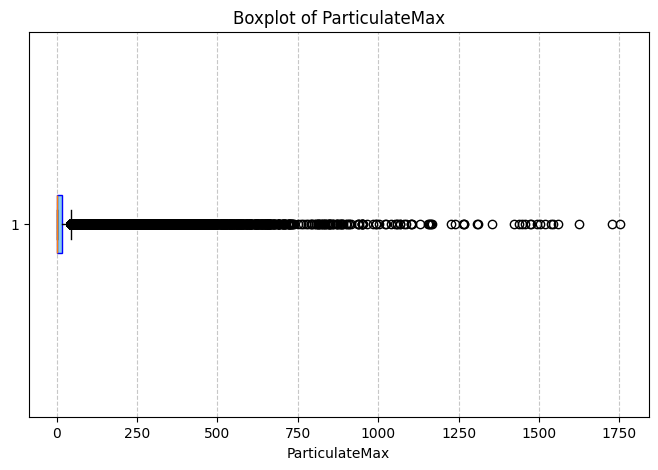

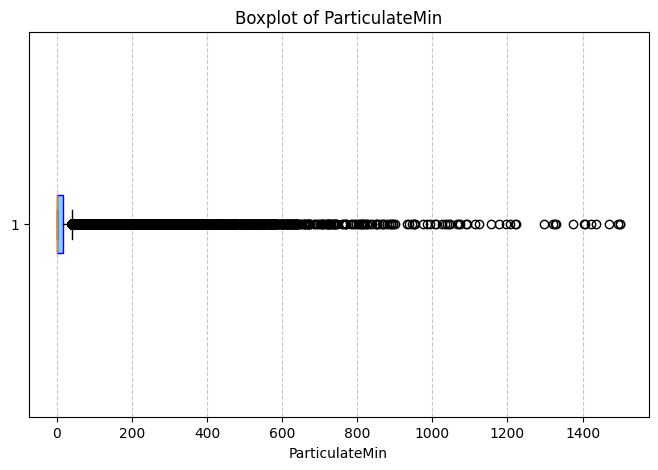

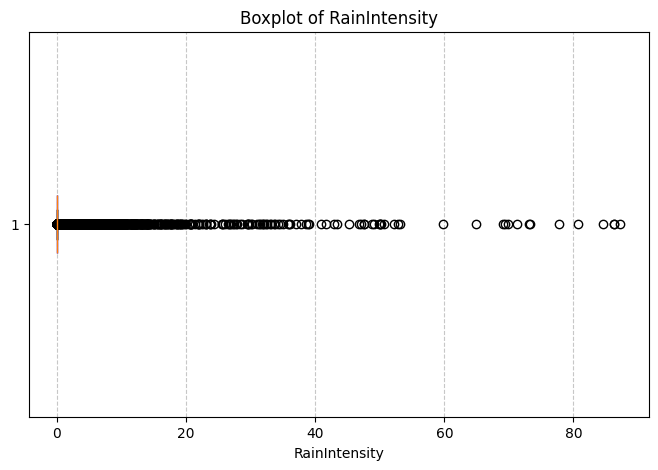

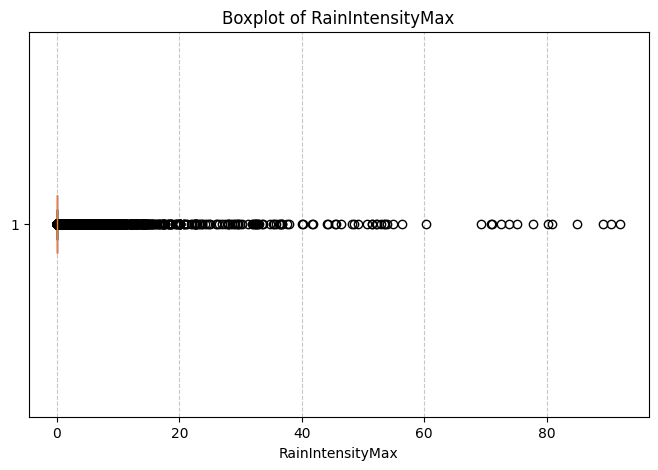

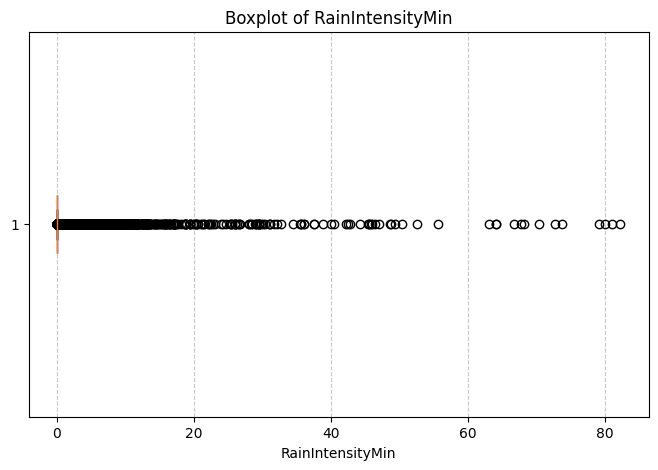

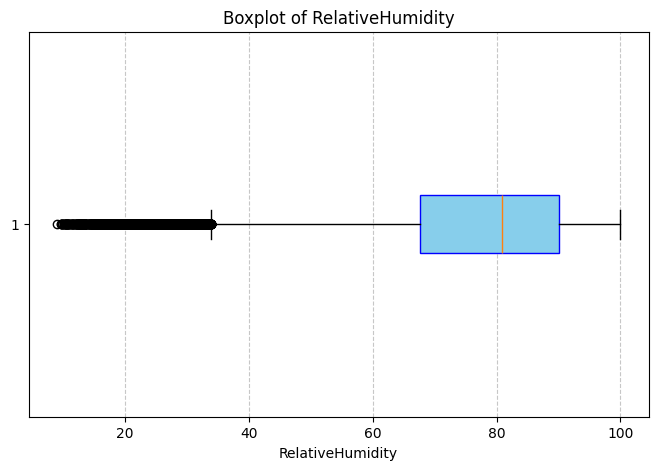

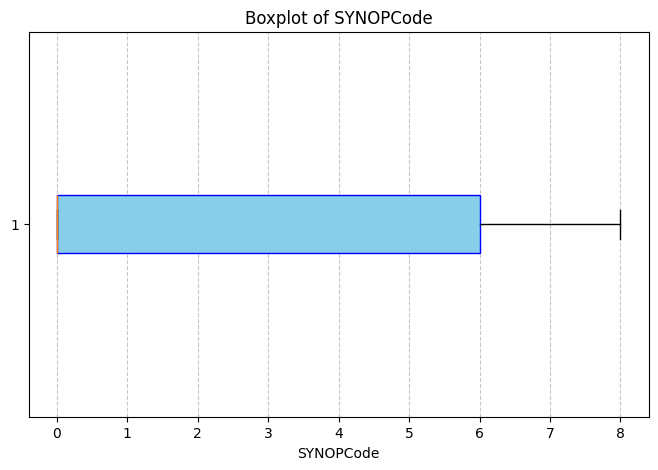

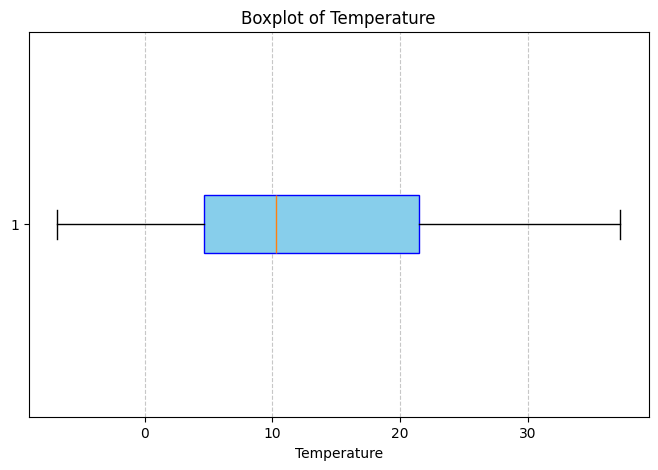

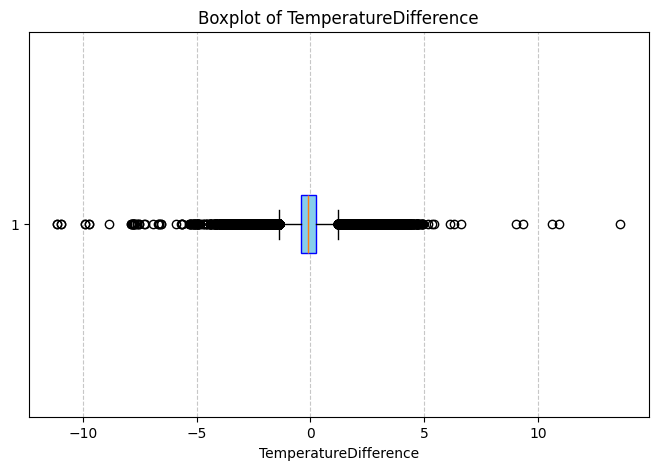

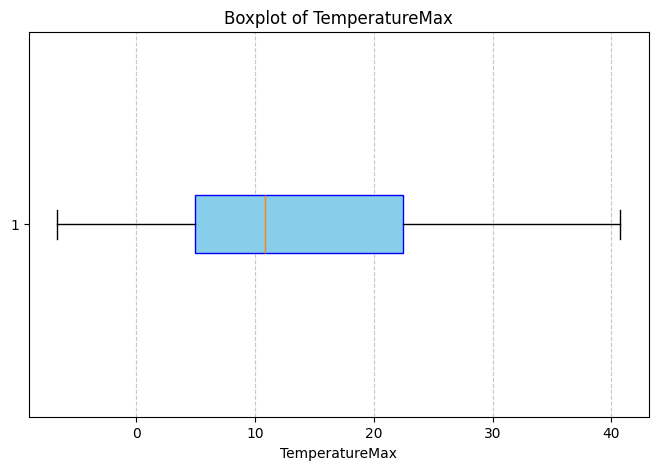

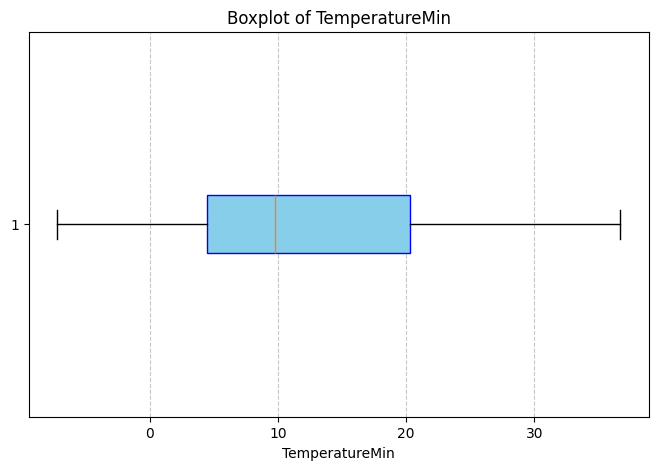

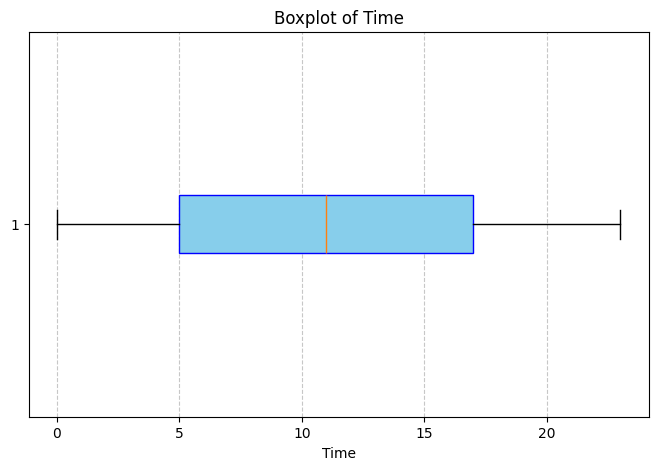

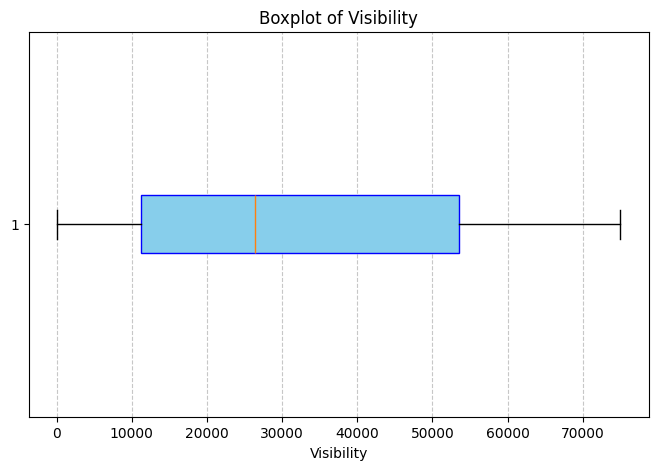

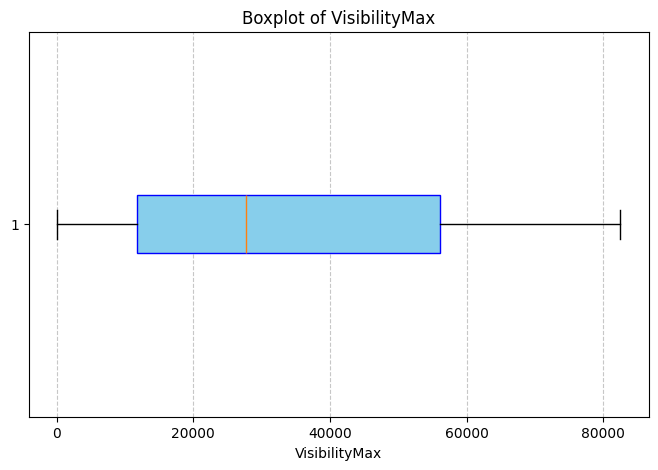

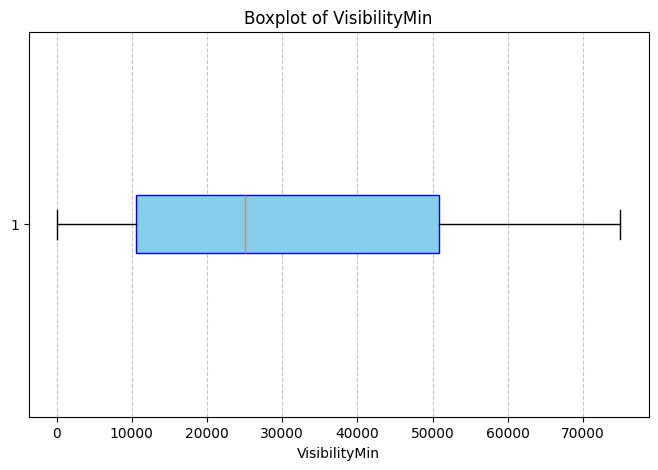

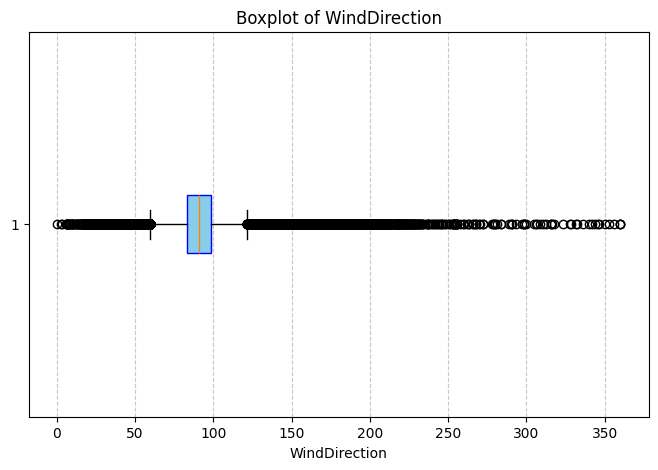

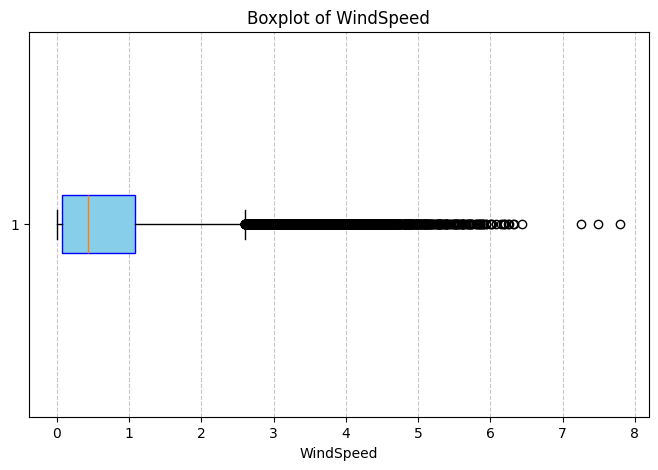

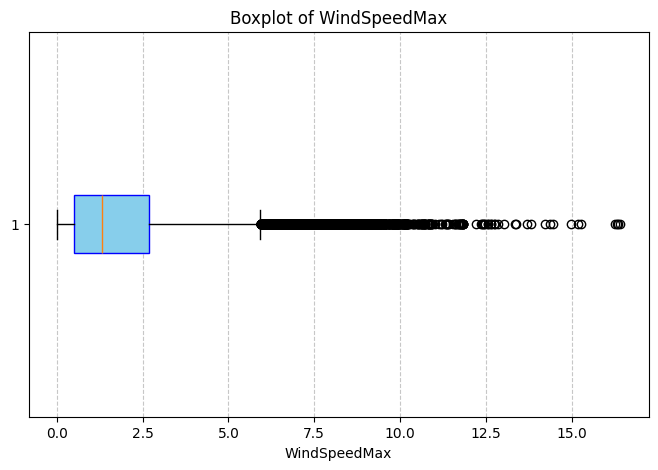

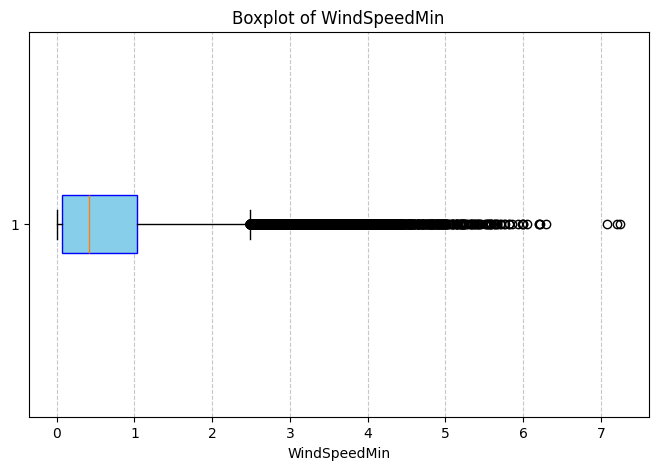

In [ ]:
# Identifing Outliers
for column in rflfso_data.columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(rflfso_data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()



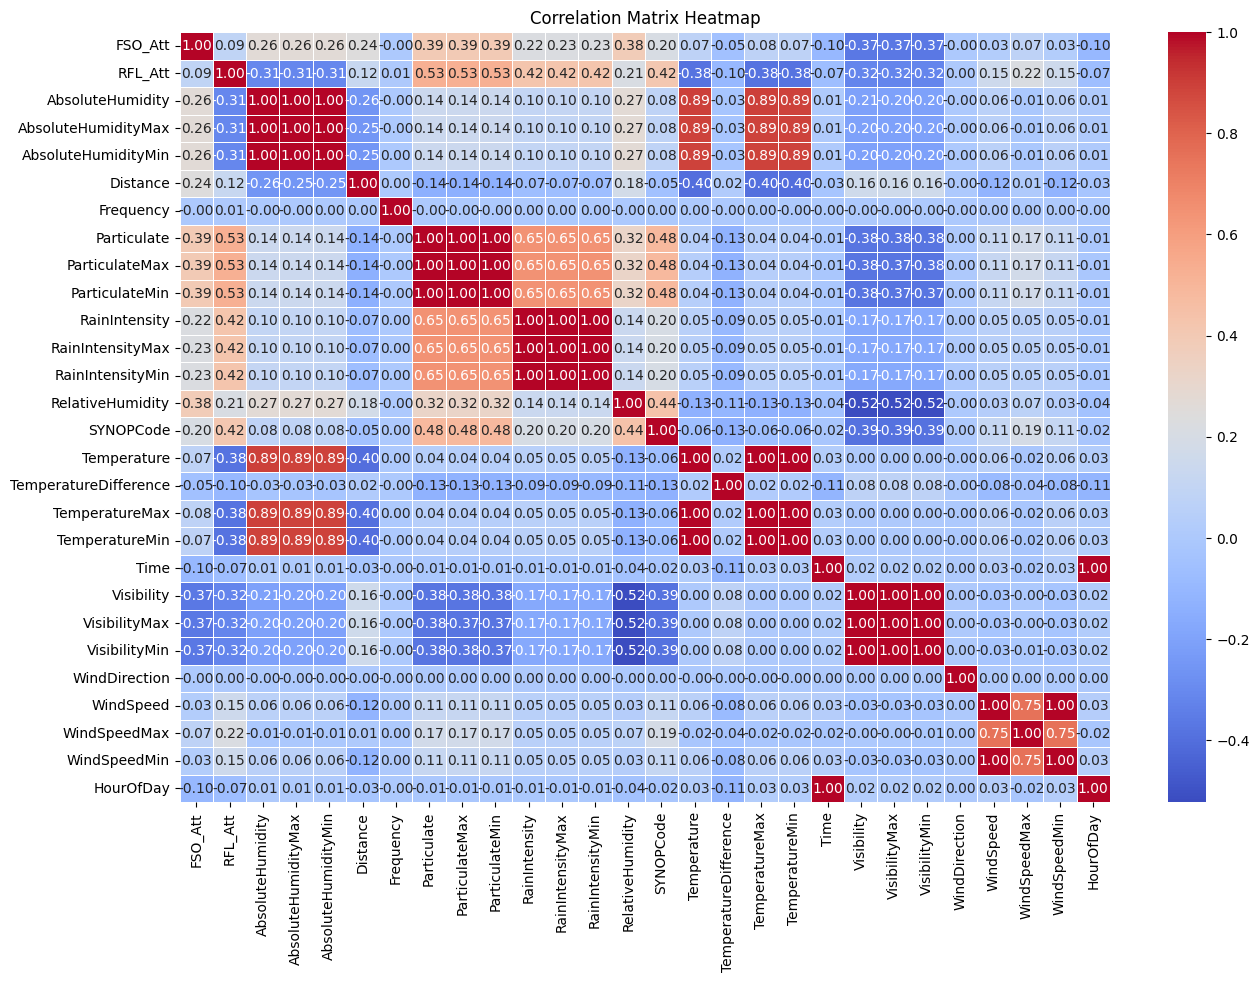

In [ ]:
# Correlation Analysis
correlation_matrix = rflfso_data.corr()

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

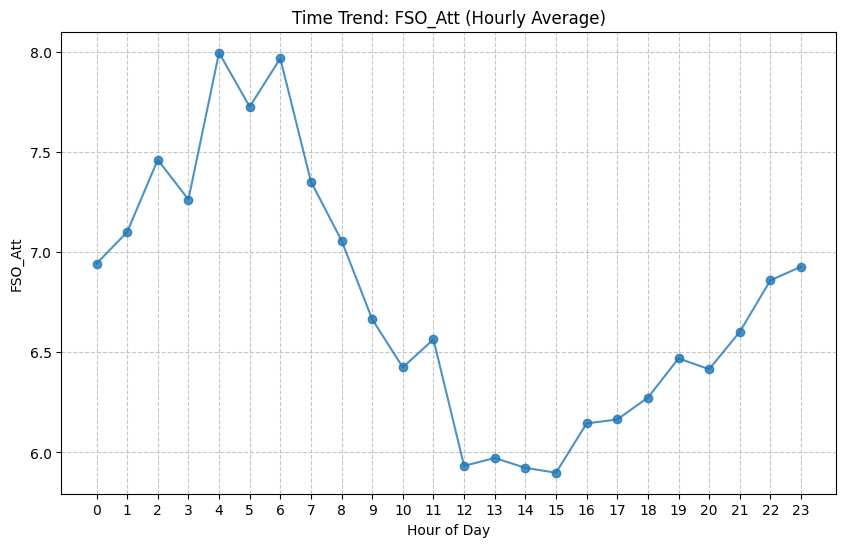

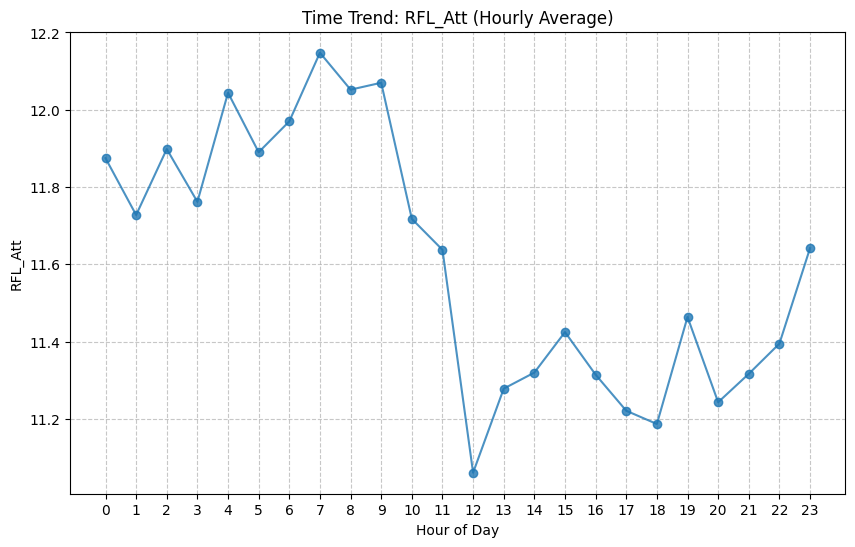

In [ ]:
# Time Trend Analysis
# Assuming 'Time' is in hours from 0-23
rflfso_data['HourOfDay'] = rflfso_data['Time'] % 24

# Aggregating by hour of the day
key_trend_columns = ['FSO_Att', 'RFL_Att']
hourly_means = rflfso_data.groupby('HourOfDay')[key_trend_columns].mean()

# Plotng the trends
for column in key_trend_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_means.index, hourly_means[column], marker='o', linestyle='-', alpha=0.8)
    plt.title(f'Time Trend: {column} (Hourly Average)')
    plt.xlabel('Hour of Day')
    plt.ylabel(column)
    plt.grid(linestyle='--', alpha=0.7)
    plt.xticks(hourly_means.index)
    plt.show()

In [ ]:
# Checking the unique SYNOPCode categories and their counts
def plot_synop_counts(data):
  synop_counts = data['SYNOPCode'].value_counts()

  # Creating a bar graph with counts of each unique SYNOPCode
  plt.figure(figsize=(10, 6))
  ax = synop_counts.plot(kind='bar', color='skyblue', edgecolor='black')

  # Adding count values on top of each bar
  for index, value in enumerate(synop_counts):
      plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

  # Adding titles and labels
  plt.title('Distribution of Unique SYNOPCode Values', fontsize=14)
  plt.xlabel('SYNOPCode', fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

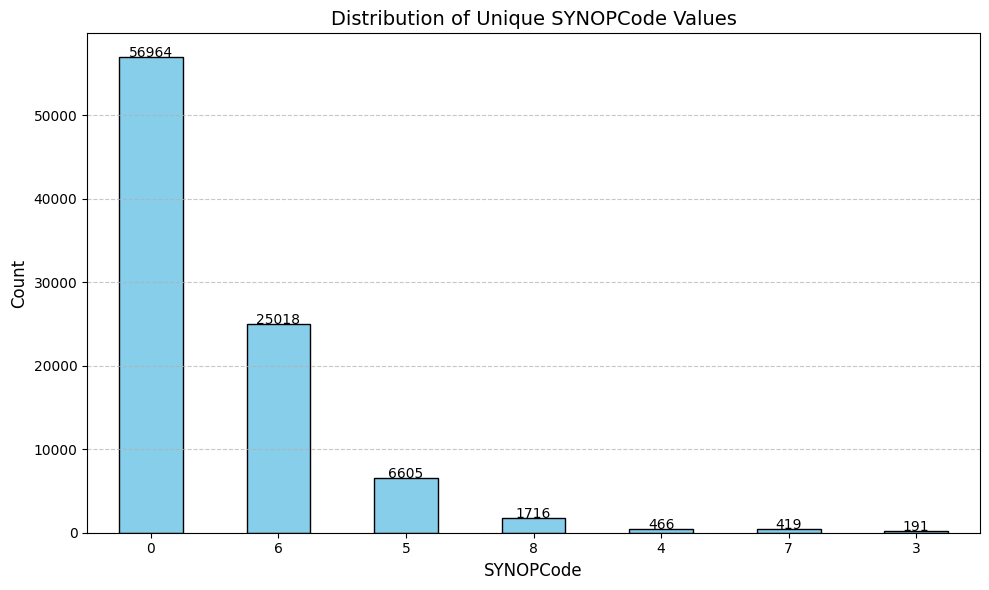

In [ ]:
plot_synop_counts(rflfso_data)

In [ ]:
# Finding the median count of SYNOPCode categories
synop_counts = rflfso_data['SYNOPCode'].value_counts()
median_count = int(synop_counts.median())

# Separating the dataset by SYNOPCode categories
groups = [rflfso_data[rflfso_data['SYNOPCode'] == code]
          for code in synop_counts.index]

# Initializing a list to hold the balanced groups
balanced_groups = []

for group in groups:
    if len(group) > median_count:
        # Down-sampling majority classes
        balanced_group = resample(group, replace=False,
                                  n_samples=median_count, random_state=42)
    elif len(group) < median_count:
        # Over-sampling minority classes
        balanced_group = resample(group, replace=True, n_samples=median_count,
                                  random_state=42)
    else:
        # Modification not needed for the groups with exact median count
        balanced_group = group

    balanced_groups.append(balanced_group)

# Combine all balanced groups into a single dataset
balanced_data = pd.concat(balanced_groups)

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balancing completed.")


Balancing completed.


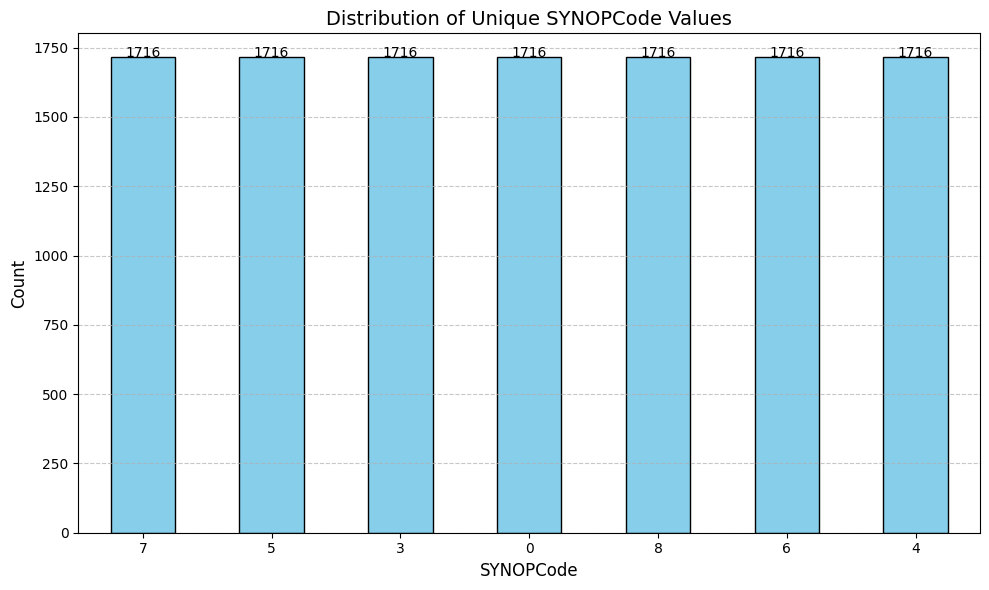

In [ ]:
sampled_data = balanced_data # For testing downsampled and balanced dataset
plot_synop_counts(sampled_data)

In [ ]:
def plot_feature_selection_results(results,target, title):
    """
    Plotting RMSE and R^2 against removed features with a cutoff line.

    Parameters:
        results (pd.DataFrame): Results from feature selection.
        title (str): Title for the plot.
    """
    rmse_values = results['RMSE']
    r2_values = results['R2']
    removed_features = results['Removed Feature']

    # Determining cutoff point where RMSE stabilizes or R^2 starts plateauing
    cutoff_index = 0
    selected_features = []
    if target == 'FSO_Att':
        cutoff_index = 12
    elif target == 'RFL_Att':
        cutoff_index = 9

    # Creating the plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting RMSE on the primary y-axis
    ax1.plot(removed_features, rmse_values, label='RMSE', color='blue', marker='o', markersize=5)
    ax1.set_xlabel('Removed Features', fontsize=12)
    ax1.set_ylabel('RMSE', fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(range(len(removed_features)))
    ax1.set_xticklabels(removed_features, rotation=45, ha='right', fontsize=10)

    # Adding R2 on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(removed_features, r2_values, label='$R^2$', color='red', marker='o', markersize=5)
    ax2.set_ylabel('$R^2$', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add vertical cutoff line
    ax1.axvline(x=cutoff_index, color='green', linestyle='--', label='Important Feature Cutoff')

    # Adding grid, legend, and title
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    ax1.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    plt.title(title, fontsize=14)
    plt.tight_layout()

    # Showing the plot
    plt.show()
    return selected_features

In [ ]:
def feature_selection(data, target, plot_cutoff=False):
    # Initializing variables
    S = list(data.columns)  # Set of all features
    S.remove(target)  # Removing the target column from the feature set
    R = []  # Table to store results
    # Excluding the target and any other non-predictor columns
    non_predictor_columns = [target, 'FSO_Att', 'RFL_Att']
    S = [col for col in data.columns if col not in non_predictor_columns]

    while S:
        # Splitting data into training and testing sets
        X = data[S]
        y = data[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Training a Random Forest model
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train, y_train)

        # Predicting and calculating RMSE and R2
        y_pred = rf.predict(X_test)
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Getting feature importances
        feature_importances = rf.feature_importances_
        feature_ranking = pd.DataFrame({
            'Feature': S,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        # Removing the least important feature
        least_important = feature_ranking.iloc[-1]['Feature']
        S.remove(least_important)

        # Appending results to the table
        R.append({
            'Removed Feature': least_important,
            'RMSE': rmse,
            'R2': r2
        })

    # Converting results to DataFrame
    results_df = pd.DataFrame(R)

    # Plotting results if plot_cutoff is True
    if plot_cutoff:
        plot_feature_selection_results(results_df, target,f"Feature Selection for {target}")

    return results_df




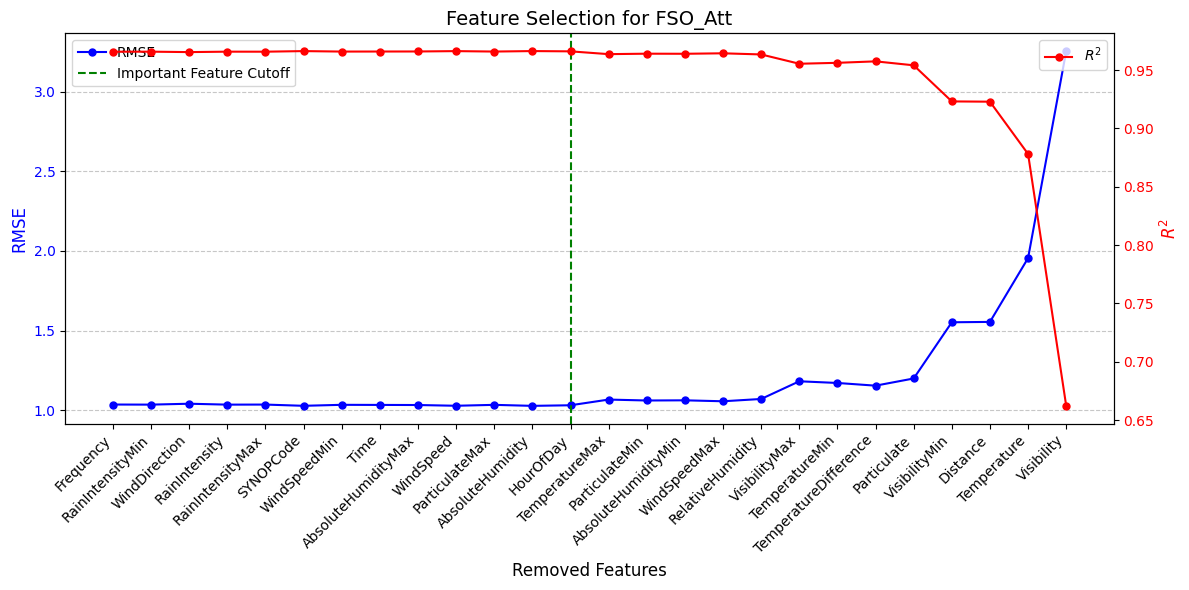

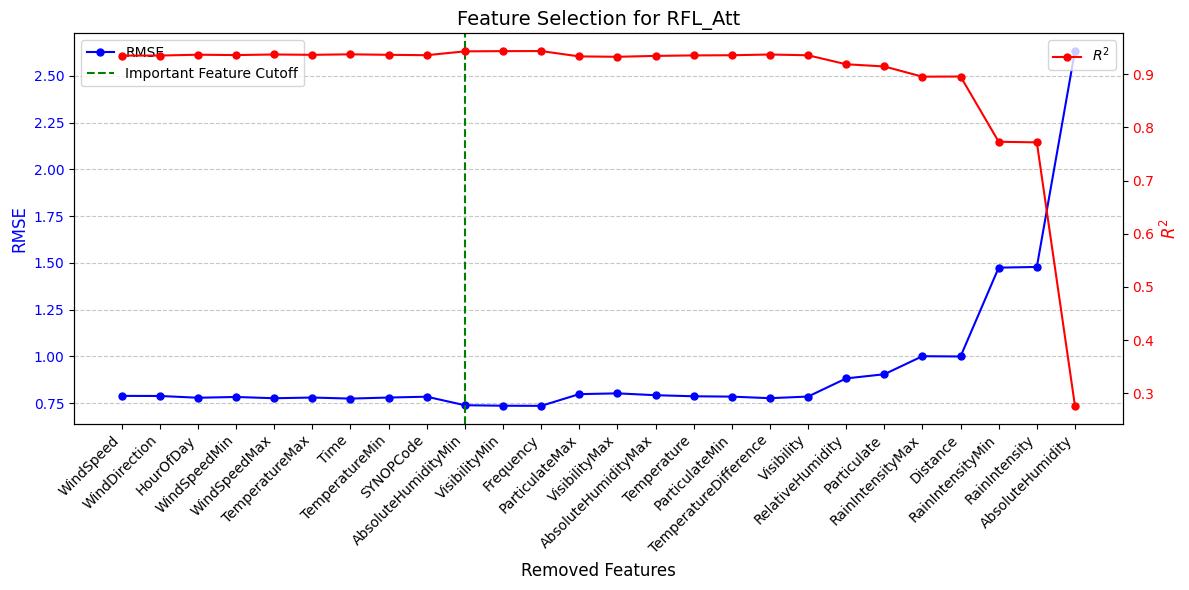

In [ ]:
# Feature selection for FSO_Att with visualization
fso_results = feature_selection(sampled_data, 'FSO_Att', plot_cutoff=True)

# Feature selection for RFL_Att with visualization
rfl_results = feature_selection(sampled_data, 'RFL_Att', plot_cutoff=True)


In [ ]:
def train_random_forest_by_condition(data, target_column, condition_column):
    # Dictionary to store models for each condition
    condition_models = {}
    mean_rmse = []
    mean_r2 = []

    # Getting unique weather conditions
    conditions = data[condition_column].unique()

    for condition in conditions:
        print(f"Training model for {condition} weather condition.")

        # Filtering data for the current condition
        subset = data[data[condition_column] == condition]

        # Splitting data into features (X) and target (y)
        # Dropping target and condition columns
        X = subset.drop(columns=[target_column, condition_column])
        y = subset[target_column]

        # Splitting into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Training Random Forest model
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train, y_train)

        # Evaluating the model
        y_pred = rf.predict(X_test)
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"RMSE for {condition}: {rmse:.4f}")
        print(f"R^2 for {condition}: {r2:.4f}")

        # Storing the trained model and metrics
        condition_models[condition] = {
            "model": rf,
            "rmse": rmse,
            "r2": r2
        }
        mean_rmse.append(rmse)
        mean_r2.append(r2)

    return {"model": condition_models, "rmse": np.mean(mean_rmse), "r2": np.mean(mean_r2)}

In [ ]:
# Extracting important features to the list based on manual cutoff index
fso_features = fso_results['Removed Feature'].iloc[12:].tolist()
rfl_features = rfl_results['Removed Feature'].iloc[9:].tolist()
fso_features,rfl_features

(['HourOfDay',
  'TemperatureMax',
  'ParticulateMin',
  'AbsoluteHumidityMin',
  'WindSpeedMax',
  'RelativeHumidity',
  'VisibilityMax',
  'TemperatureMin',
  'TemperatureDifference',
  'Particulate',
  'VisibilityMin',
  'Distance',
  'Temperature',
  'Visibility'],
 ['AbsoluteHumidityMin',
  'VisibilityMin',
  'Frequency',
  'ParticulateMax',
  'VisibilityMax',
  'AbsoluteHumidityMax',
  'Temperature',
  'ParticulateMin',
  'TemperatureDifference',
  'Visibility',
  'RelativeHumidity',
  'Particulate',
  'RainIntensityMax',
  'Distance',
  'RainIntensityMin',
  'RainIntensity',
  'AbsoluteHumidity'])

In [ ]:
# Adding 'FSO_Att' and 'SYNOPCode' columns for splitting and training the FSO model
ds_fso_data = sampled_data[fso_features + ['FSO_Att','SYNOPCode']]
ds_fso_data.head()

,HourOfDay,TemperatureMax,ParticulateMin,AbsoluteHumidityMin,WindSpeedMax,RelativeHumidity,VisibilityMax,TemperatureMin,TemperatureDifference,Particulate,VisibilityMin,Distance,Temperature,Visibility,FSO_Att,SYNOPCode
0,22,1.635572,58.959648,4.287520,2.749719,80.117042,14110.576718,1.537707,-2.278,63.166885,12585.808024,4826.747286,1.632441,13713.229720,20.728542,7
1,12,25.900276,110.186412,17.770222,3.876472,81.174895,29981.001272,24.327062,-2.390,116.605014,26551.239932,2119.278465,24.565429,28246.226650,9.143786,5
2,0,0.362920,40.104119,4.446057,4.470577,94.094828,5731.951674,0.326853,-0.250,42.195469,4981.894842,4820.756546,0.345530,5222.240046,18.002088,7
3,15,24.347573,0.000000,16.520508,0.248447,80.530856,9636.848197,22.545202,1.210,0.000000,8638.557656,2961.091058,24.277412,9097.857630,7.744657,3
4,11,0.819660,6.580840,3.722050,2.062183,78.363584,17867.527724,0.731885,0.400,6.894476,15988.306903,4824.096433,0.790258,17207.492800,8.866033,7


In [ ]:
# Adding 'FSO_Att' and 'SYNOPCode' columns for splitting and training the RFL model
ds_rfl_data = sampled_data[rfl_features + ['RFL_Att','SYNOPCode']]
ds_rfl_data.head()

,AbsoluteHumidityMin,VisibilityMin,Frequency,ParticulateMax,VisibilityMax,AbsoluteHumidityMax,Temperature,ParticulateMin,TemperatureDifference,Visibility,RelativeHumidity,Particulate,RainIntensityMax,Distance,RainIntensityMin,RainIntensity,AbsoluteHumidity,RFL_Att,SYNOPCode
0,4.287520,12585.808024,73500000000,66.066092,14110.576718,4.659275,1.632441,58.959648,-2.278,13713.229720,80.117042,63.166885,0.056712,4826.747286,0.049570,0.053582,4.344729,14.328048,7
1,17.770222,26551.239932,83500000000,126.022853,29981.001272,19.469892,24.565429,110.186412,-2.390,28246.226650,81.174895,116.605014,0.000000,2119.278465,0.000000,0.000000,18.238292,7.231835,5
2,4.446057,4981.894842,73500000000,45.145227,5731.951674,4.718308,0.345530,40.104119,-0.250,5222.240046,94.094828,42.195469,0.454476,4820.756546,0.388463,0.413878,4.673174,15.267329,7
3,16.520508,8638.557656,83500000000,0.000000,9636.848197,19.320576,24.277412,0.000000,1.210,9097.857630,80.530856,0.000000,0.000000,2961.091058,0.000000,0.000000,17.801127,8.410405,3
4,3.722050,15988.306903,73500000000,6.944269,17867.527724,4.116686,0.790258,6.580840,0.400,17207.492800,78.363584,6.894476,0.009617,4824.096433,0.008482,0.009088,4.012412,11.216286,7


In [ ]:
# Training specific models for each weather conditions
fso_models = train_random_forest_by_condition(ds_fso_data, target_column='FSO_Att', condition_column='SYNOPCode')
rfl_models = train_random_forest_by_condition(ds_rfl_data, target_column='RFL_Att', condition_column='SYNOPCode')

Training model for 7 weather condition.
RMSE for 7: 0.2208
R^2 for 7: 0.9984
Training model for 5 weather condition.
RMSE for 5: 1.2711
R^2 for 5: 0.8891
Training model for 3 weather condition.
RMSE for 3: 0.1854
R^2 for 3: 0.9995
Training model for 0 weather condition.
RMSE for 0: 1.2338
R^2 for 0: 0.8607
Training model for 8 weather condition.
RMSE for 8: 1.0835
R^2 for 8: 0.9331
Training model for 6 weather condition.
RMSE for 6: 1.5799
R^2 for 6: 0.8628
Training model for 4 weather condition.
RMSE for 4: 0.1451
R^2 for 4: 0.9986
Training model for 7 weather condition.
RMSE for 7: 0.0693
R^2 for 7: 0.9978
Training model for 5 weather condition.
RMSE for 5: 1.0240
R^2 for 5: 0.8794
Training model for 3 weather condition.
RMSE for 3: 0.0115
R^2 for 3: 1.0000
Training model for 0 weather condition.
RMSE for 0: 0.5170
R^2 for 0: 0.9586
Training model for 8 weather condition.
RMSE for 8: 1.1774
R^2 for 8: 0.8723
Training model for 6 weather condition.
RMSE for 6: 0.8967
R^2 for 6: 0.9396

In [ ]:
def train_generic_random_forest(data, target_column):

    # Splitting data into features (X) and target (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Splitting into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training Random Forest model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    # Evaluatings model
    y_pred = rf.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R^2 score

    print(f"RMSE: {rmse:.4f}")
    print(f"R^2: {r2:.4f}")

    return {"model": rf, "rmse": rmse, "r2": r2}




In [ ]:
# Training the generic model
fso_results = train_generic_random_forest(ds_fso_data, target_column='FSO_Att')
rfl_results = train_generic_random_forest(ds_rfl_data, target_column='RFL_Att')

RMSE: 1.0198
R^2: 0.9669
RMSE: 0.7739
R^2: 0.9375


In [ ]:
# Displaying the Mean RMSE and R2 scores for specific model
print(f"Mean RMSE for FSO: {fso_models['rmse']:.4f}")
print(f"Mean R^2 for FSO: {fso_models['r2']:.4f}")
print(f"Mean RMSE for RFL: {rfl_models['rmse']:.4f}")
print(f"Mean R^2 for RFL: {rfl_results['r2']:.4f}")

Mean RMSE for FSO: 0.8171
Mean R^2 for FSO: 0.9346
Mean RMSE for RFL: 0.5420
Mean R^2 for RFL: 0.9375


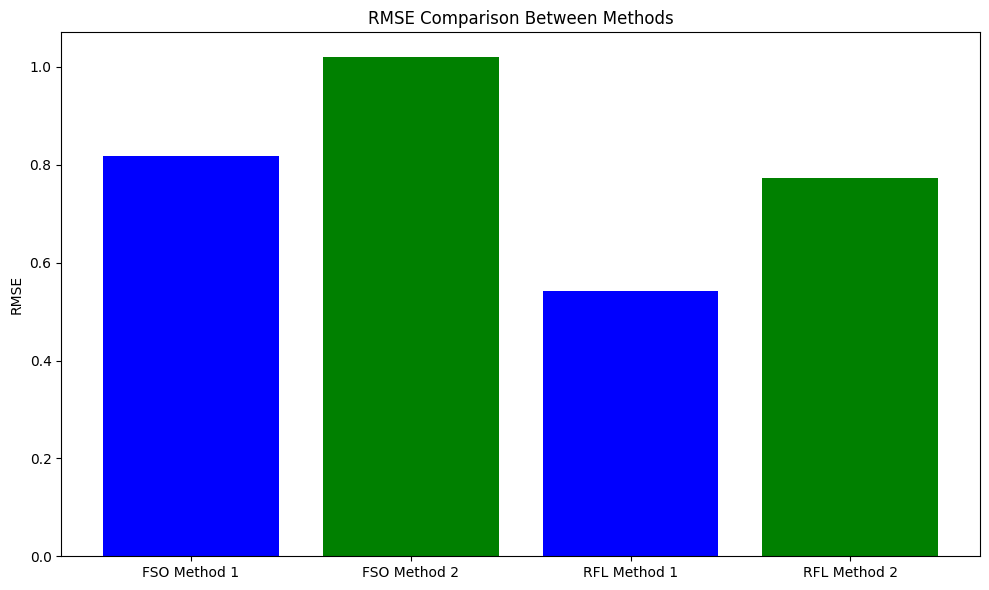

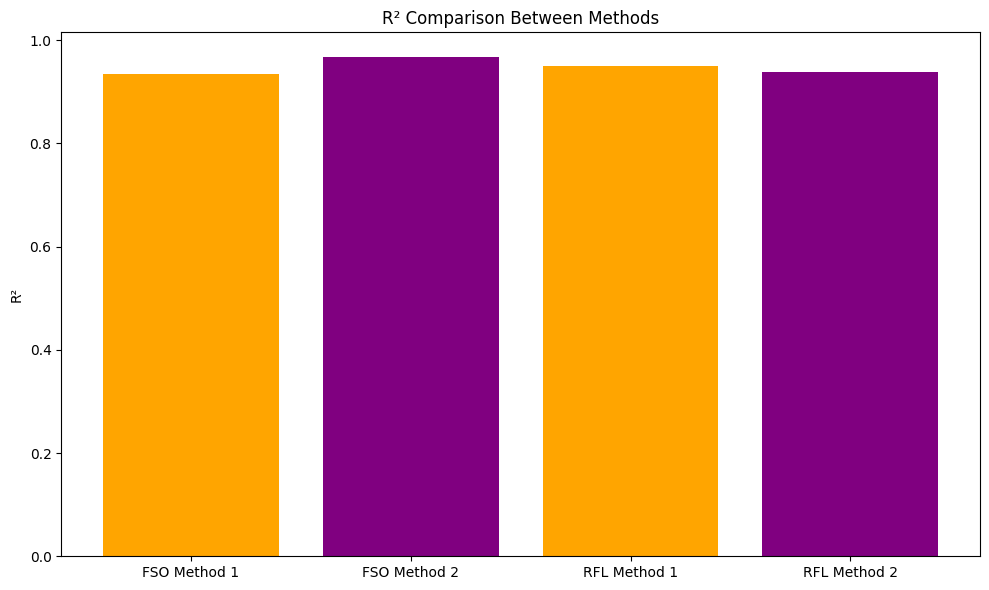

In [ ]:
# Metrics for Method 1 (Specific Model)
fso_mean_rmse_method1 = fso_models['rmse']
fso_mean_r2_method1 = fso_models['r2']
rfl_mean_rmse_method1 = rfl_models['rmse']
rfl_mean_r2_method1 = rfl_models['r2']

# Metrics for Method 2 (Generic Model)
fso_rmse_method2 = fso_results['rmse']
fso_r2_method2 = fso_results['r2']
rfl_rmse_method2 = rfl_results['rmse']
rfl_r2_method2 = rfl_results['r2']

# RMSE Comparison Plot
plt.figure(figsize=(10, 6))
methods = ['FSO Method 1', 'FSO Method 2', 'RFL Method 1', 'RFL Method 2']
rmse_values = [fso_mean_rmse_method1, fso_rmse_method2, rfl_mean_rmse_method1, rfl_rmse_method2]
plt.bar(methods, rmse_values, color=['blue', 'green', 'blue', 'green'])
plt.title('RMSE Comparison Between Methods')
plt.ylabel('RMSE')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# R2 Comparison Plot
plt.figure(figsize=(10, 6))
r2_values = [fso_mean_r2_method1, fso_r2_method2, rfl_mean_r2_method1, rfl_r2_method2]
plt.bar(methods, r2_values, color=['orange', 'purple', 'orange', 'purple'])
plt.title('R² Comparison Between Methods')
plt.ylabel('R²')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
